In [1]:
from modules.PageExtractor import *
from modules.utils import *

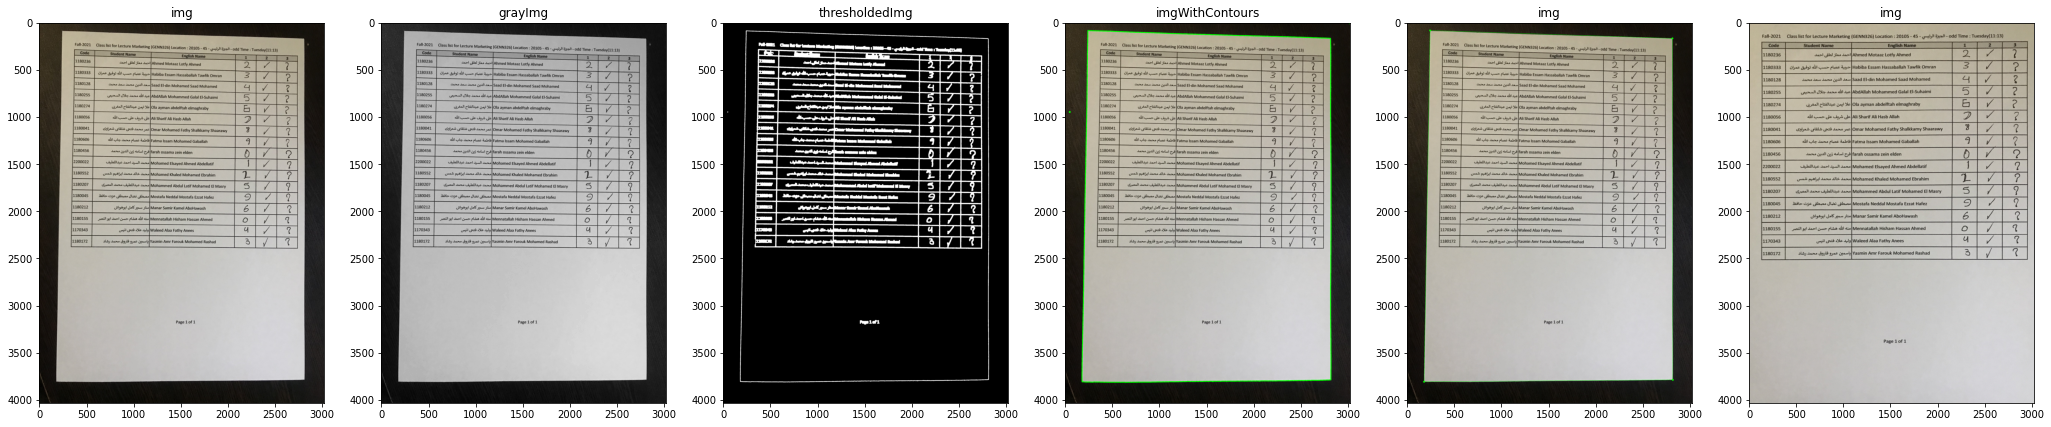

In [2]:
img=io.imread('./Data set/grade sheet/11.jpg')
imageArr=getPageWarped(img, thresh1=180)
show_images(imageArr,titles=['img','grayImg','thresholdedImg','imgWithContours','img','img'])
Table_Extracted=np.copy(imageArr[5])

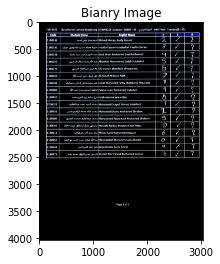

In [3]:
# print(np.max(Table_Extracted))
# print(np.shape(Table_Extracted))
# Table_Extracted=rgb2gray(Table_Extracted)
# Converting table to binary
thresh,img_bin = cv2.threshold(Table_Extracted,128,255,cv2.THRESH_BINARY)
# thresh,img_bin = cv2.threshold(Table_Extracted,128,255,cv2.THRESH_OTSU)

img_bin = 255-img_bin
show_images([img_bin],titles=['Bianry Image'])

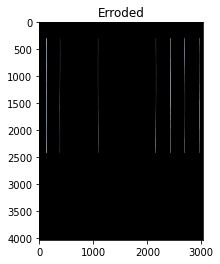

In [4]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//150))
eroded_image = cv2.erode(img_bin, vertical_kernel, iterations=10)
show_images([eroded_image],titles=['Erroded'])

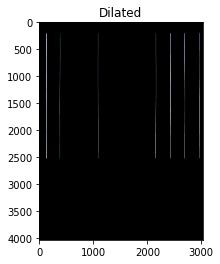

In [5]:
vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=10)
show_images([vertical_lines],titles=['Dilated'])

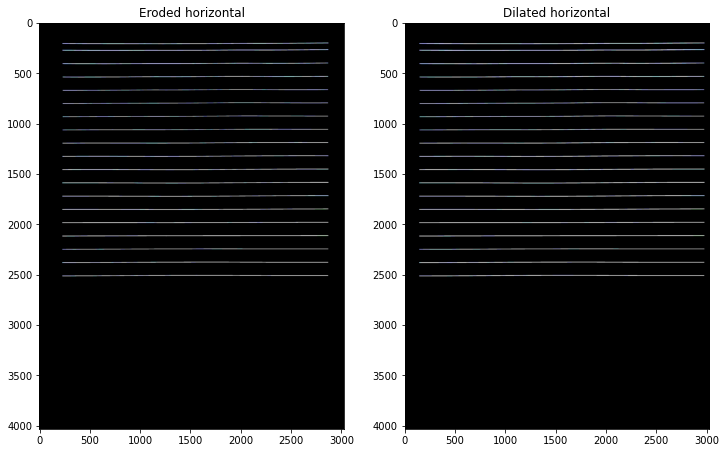

In [6]:
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//150, 1))
image_2 = cv2.erode(img_bin, hor_kernel, iterations=10)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=10)
show_images([image_2,horizontal_lines],titles=['Eroded horizontal','Dilated horizontal'])

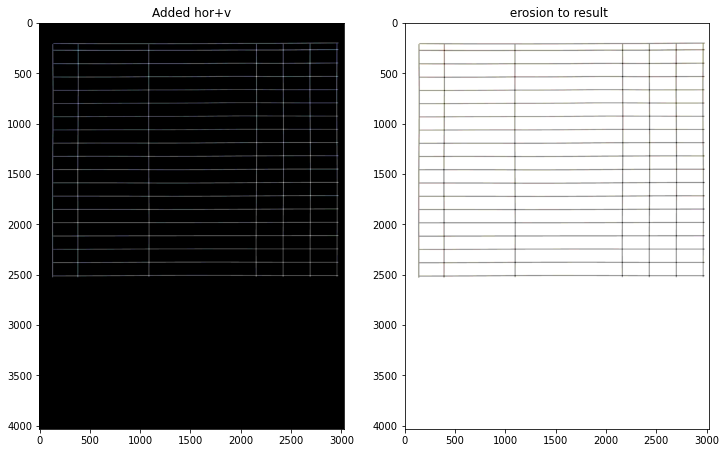

In [7]:
vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines_2 = cv2.erode(~vertical_horizontal_lines, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)), iterations=3)
show_images([vertical_horizontal_lines,vertical_horizontal_lines_2],titles=['Added hor+v',' erosion to result'])

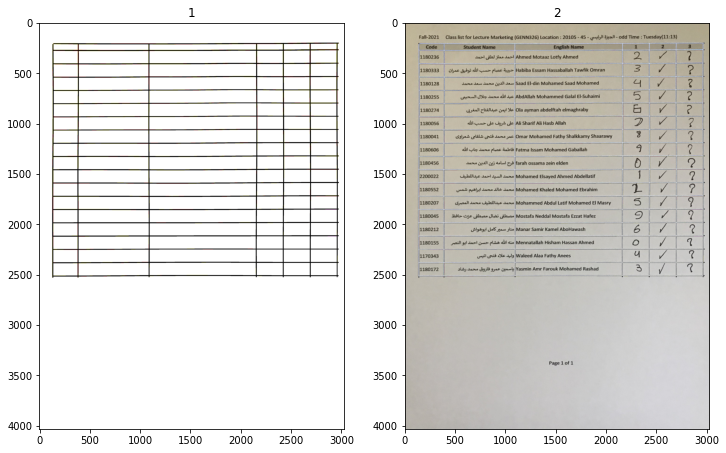

In [8]:
thresh, vertical_horizontal_lines_3 = cv2.threshold(vertical_horizontal_lines_2,128,255, cv2.THRESH_BINARY)
b_image = cv2.bitwise_not(cv2.bitwise_xor(Table_Extracted,vertical_horizontal_lines_3))
show_images([vertical_horizontal_lines_3,b_image],titles=['1','2'])

In [9]:
img1 = cv2.cvtColor(vertical_horizontal_lines_3, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(img1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
boundingBoxes = [cv2.boundingRect(c) for c in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
key=lambda x:x[1][1]))

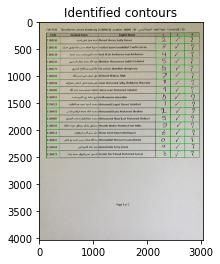

In [11]:
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<500 and h<500):
        image = cv2.rectangle(Table_Extracted,(x,y),(x+w,y+h),(0,255,0),2)
        boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [12]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
    if(boxes[i][1]<=previous[1]+mean/2):
        columns.append(boxes[i])
        previous=boxes[i]
        if(i==len(boxes)-1):
            rows.append(columns)
    else:
        rows.append(columns)
        columns=[]
        previous = boxes[i]
        columns.append(boxes[i])
print("Rows")
for row in rows:
    print(row)
    
print(np.shape(rows))

178.4814814814815
Rows
[[2693, 204, 259, 58], [2427, 206, 258, 58], [2693, 270, 258, 125], [2427, 272, 257, 125], [2162, 275, 256, 123], [143, 276, 243, 125]]
[[2692, 403, 258, 124], [2427, 405, 256, 124], [2162, 406, 256, 123], [144, 409, 242, 125]]
[[2692, 535, 258, 125], [2427, 537, 256, 123], [2163, 537, 255, 123], [145, 542, 241, 124]]
[[2163, 666, 256, 124], [2693, 667, 256, 124], [2428, 668, 256, 123], [146, 674, 240, 123]]
[[2164, 797, 256, 124], [2693, 799, 256, 123], [2428, 799, 257, 123], [145, 805, 240, 124]]
[[2164, 928, 256, 124], [2430, 929, 256, 124], [2694, 930, 256, 123], [145, 935, 239, 125]]
[[2164, 1060, 257, 124], [2695, 1061, 256, 123], [2430, 1061, 256, 123], [144, 1067, 240, 123]]
[[2696, 1193, 256, 123], [2430, 1193, 257, 122], [2164, 1193, 257, 123], [143, 1199, 240, 122]]
[[2697, 1324, 256, 123], [2430, 1324, 258, 124], [2163, 1325, 258, 124], [142, 1330, 240, 123]]
[[2697, 1456, 256, 123], [2430, 1456, 258, 124], [2163, 1457, 258, 125], [142, 1462, 239, 123

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [13]:
total_cells=0
for i in range(len(row)):
    if len(row[i]) > total_cells:
        total_cells = len(row[i])
print(total_cells)

4


In [14]:
center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
print(center)
center=np.array(center)
center.sort()
print(center)

[2291, 2821, 2556, 266]
[ 266 2291 2556 2821]


In [15]:
boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
#     print(l)
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
#         print(indexing)
        l[indexing-1].append(rows[i][j])
    boxes_list.append(l)
for box in boxes_list:
    print(box)

[[[2162, 275, 256, 123]], [[2427, 206, 258, 58], [2427, 272, 257, 125]], [[2693, 204, 259, 58], [2693, 270, 258, 125]], [[143, 276, 243, 125]]]
[[[2162, 406, 256, 123]], [[2427, 405, 256, 124]], [[2692, 403, 258, 124]], [[144, 409, 242, 125]]]
[[[2163, 537, 255, 123]], [[2427, 537, 256, 123]], [[2692, 535, 258, 125]], [[145, 542, 241, 124]]]
[[[2163, 666, 256, 124]], [[2428, 668, 256, 123]], [[2693, 667, 256, 124]], [[146, 674, 240, 123]]]
[[[2164, 797, 256, 124]], [[2428, 799, 257, 123]], [[2693, 799, 256, 123]], [[145, 805, 240, 124]]]
[[[2164, 928, 256, 124]], [[2430, 929, 256, 124]], [[2694, 930, 256, 123]], [[145, 935, 239, 125]]]
[[[2164, 1060, 257, 124]], [[2430, 1061, 256, 123]], [[2695, 1061, 256, 123]], [[144, 1067, 240, 123]]]
[[[2164, 1193, 257, 123]], [[2430, 1193, 257, 122]], [[2696, 1193, 256, 123]], [[143, 1199, 240, 122]]]
[[[2163, 1325, 258, 124]], [[2430, 1324, 258, 124]], [[2697, 1324, 256, 123]], [[142, 1330, 240, 123]]]
[[[2163, 1457, 258, 125]], [[2430, 1456, 258

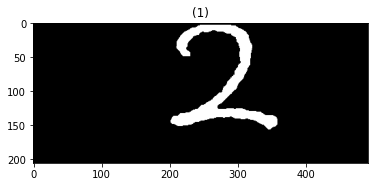

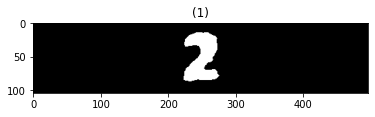

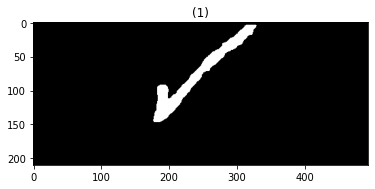

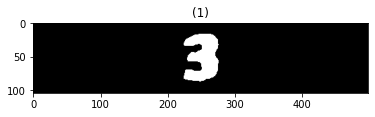

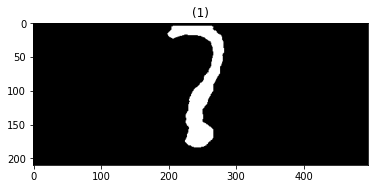

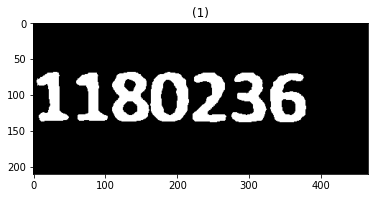

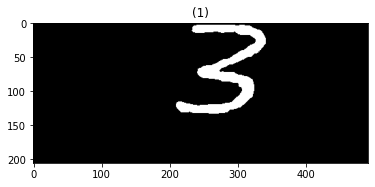

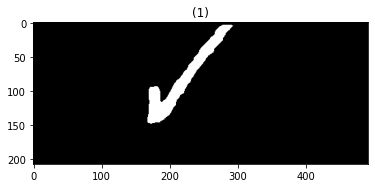

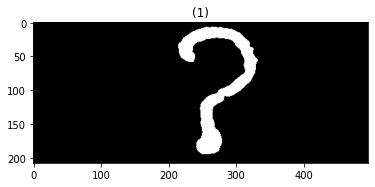

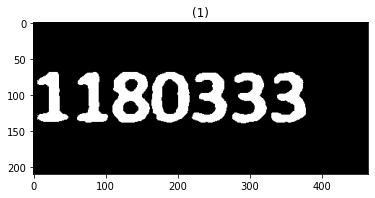

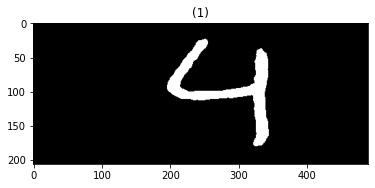

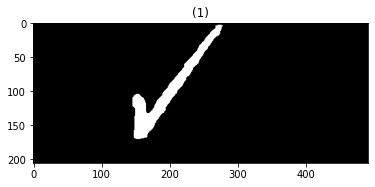

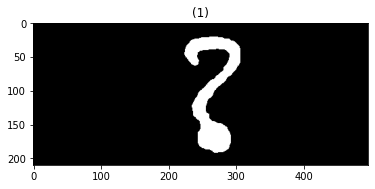

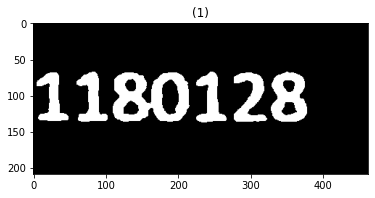

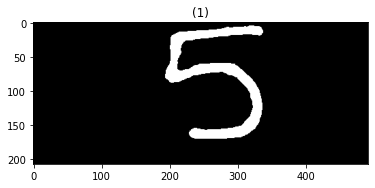

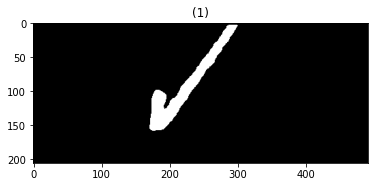

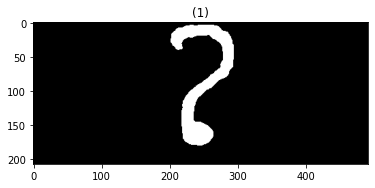

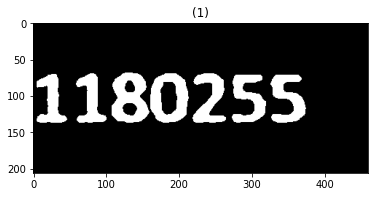

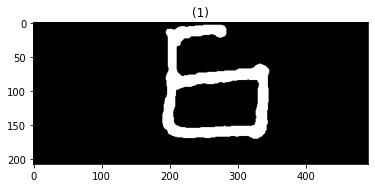

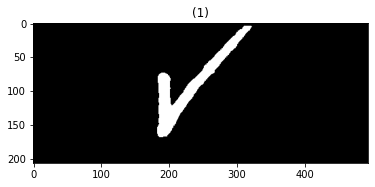

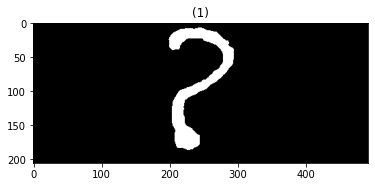

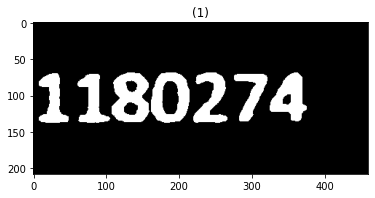

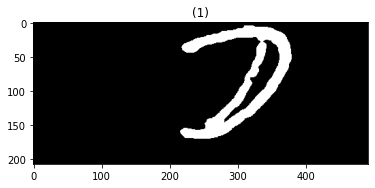

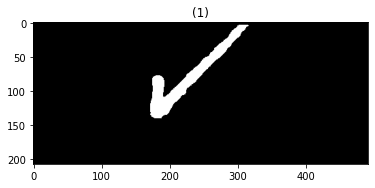

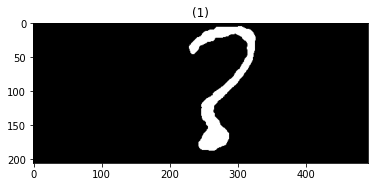

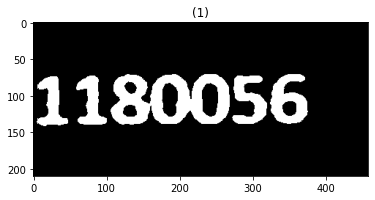

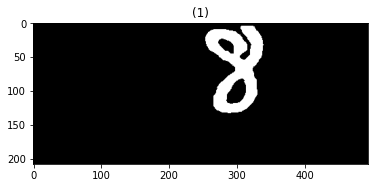

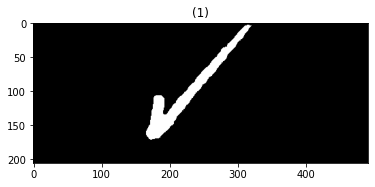

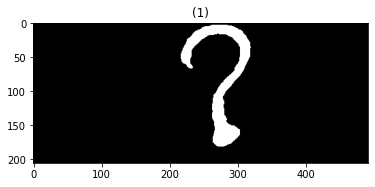

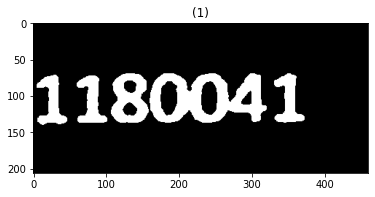

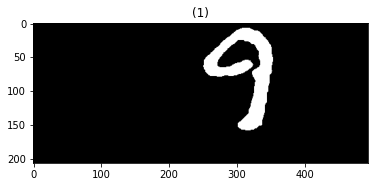

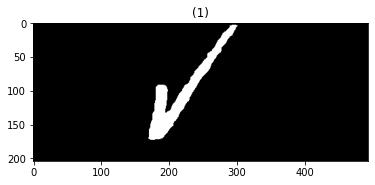

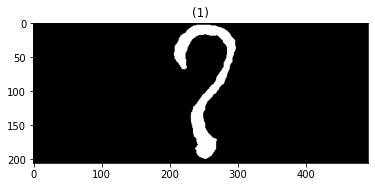

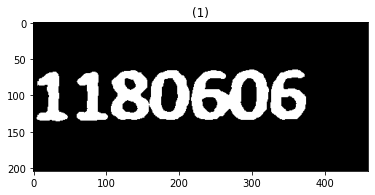

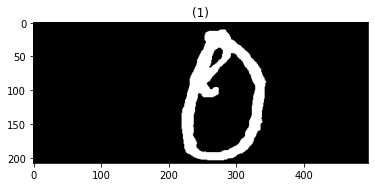

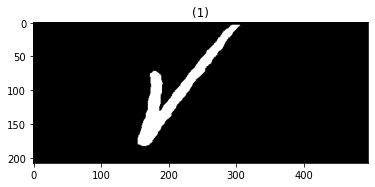

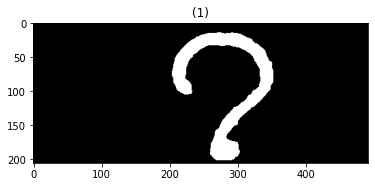

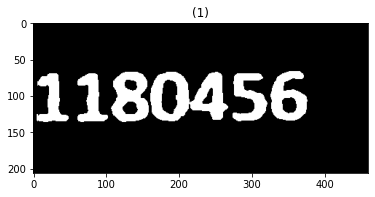

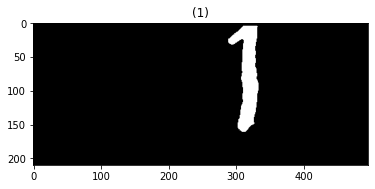

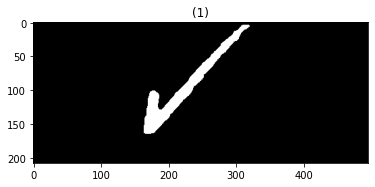

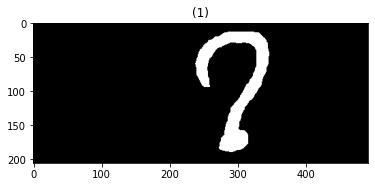

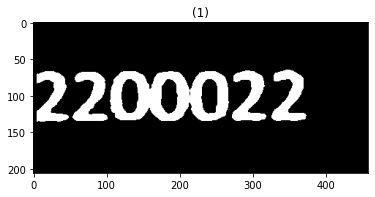

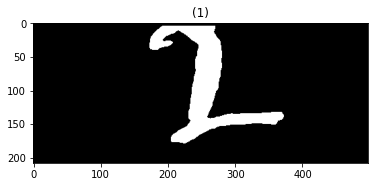

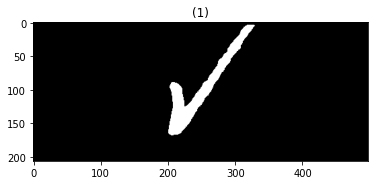

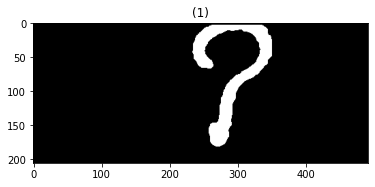

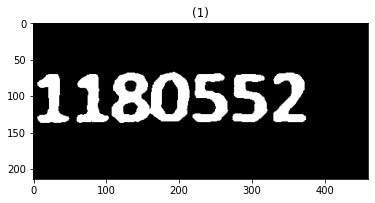

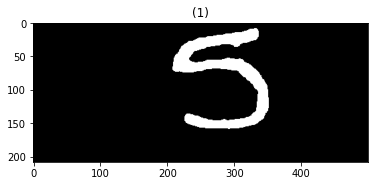

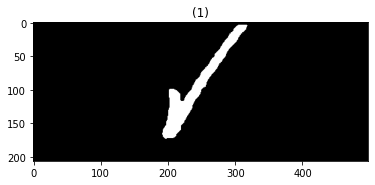

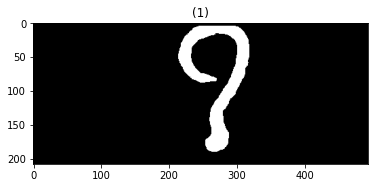

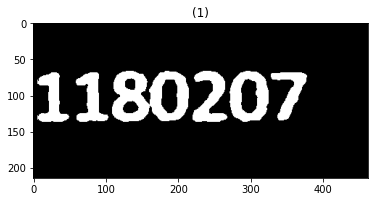

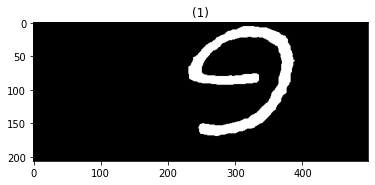

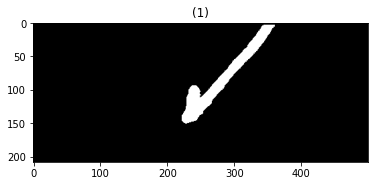

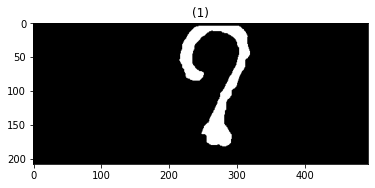

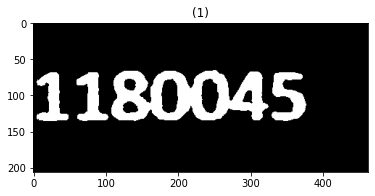

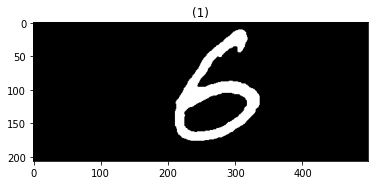

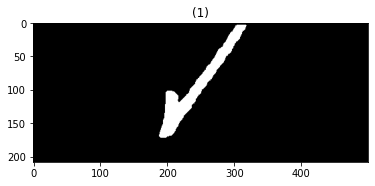

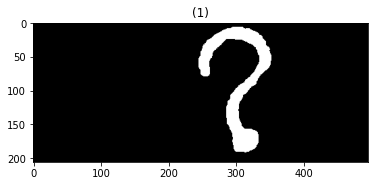

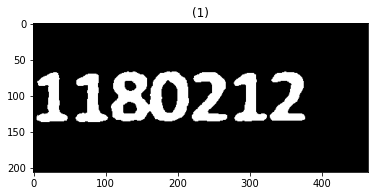

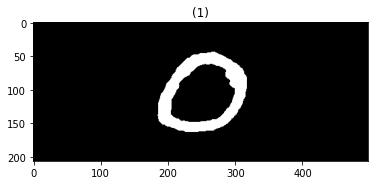

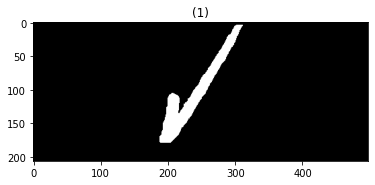

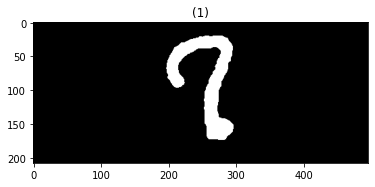

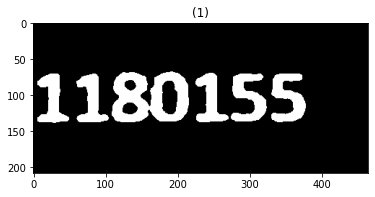

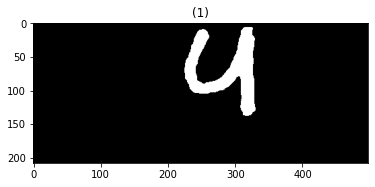

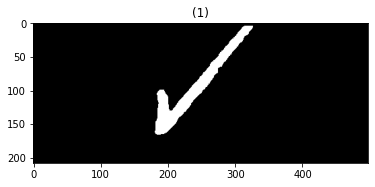

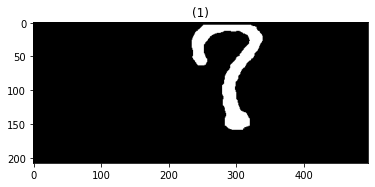

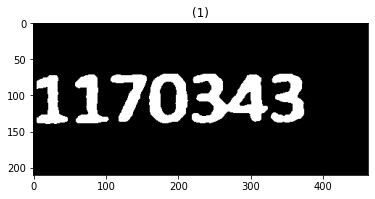

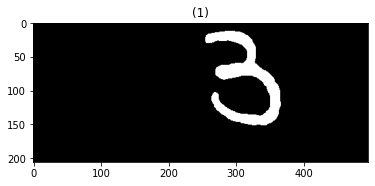

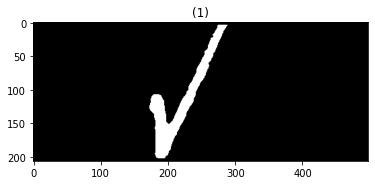

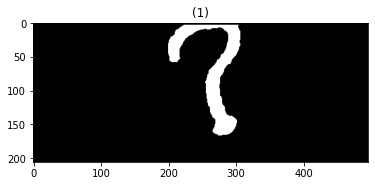

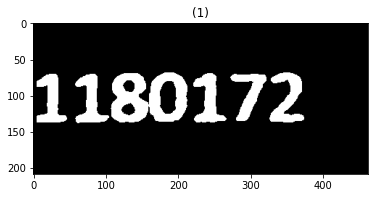

['', '', '', '1180236', '', '', '', '1180333', '', '', '', '1180128', '', '', '', '1180255', '', '', '', '1180274', '', '', '', '1180056', '', '', '', '1180041', '', '', '', '1180606', '', '', '', '1180456', '', '', '', '2200022', '', '', '', '1180552', '', '', '', '1180207', '', '', '', '1180045', '', '', '', '1180212', '', '', '', '1180155', '', '', '', '1170343', '', '', '', '1180172']


In [16]:
import pytesseract
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = image[x:x+h, y:y+w]
                cropHeight= int(0.1* roi.shape[0])
                cropWidth= int(0.03* roi.shape[1])
                roi= roi[cropHeight:-cropHeight,cropWidth:-cropWidth]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)
                img3 = cv2.cvtColor(erosion, cv2.COLOR_BGR2GRAY)
                thresh = cv2.threshold(img3, 127, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)[1]
                options = "outputbase digits"
                out = pytesseract.image_to_string( thresh,config=options)
                show_images([thresh])
                io.imsave('./cells/11'+str(i)+str(j)+str(k)+'.jpg',thresh)
                out=out.replace("\n","").replace("|","").replace("_","").replace("[","").strip()
                if(len(out)==0):
                    out = pytesseract.image_to_string(thresh)
                else:
                    s = s +" "+ out
            dataframe_final.append(s.strip())
print(dataframe_final)

In [17]:
arr = np.array(dataframe_final)

In [18]:
import pandas as pd
dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))
# data = dataframe.style.set_properties(align="left")
#print(data)
#print(dataframe)
# d=[]
# for i in range(0,len(rows)):
#     for j in range(0,total_cells):
#         print(dataframe[i][j],end=" ")
# print()

In [19]:
dataframe.to_csv("output.csv")